# Customer_Churn

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

# 1. Importing Required Libraries

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 2. The data set includes information about:

1. Customers who left within certain period of month – the column is called Churn

2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

4. Demographic info about customers – gender, age range, and if they have partners and dependents

# 2.1 Each table is described below.

# 2.1.1 Demographics

1. CustomerID: A unique ID that identifies each customer.
    
2. Gender: The customer’s gender: Male, Female.
        
3. Senior Citizen: Indicates if the customer is 65 or older: Yes, No
        
4. Partner : Whether the customer has a partner or not (Yes, No)
    
5. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

# 2.1.2 Services


CustomerID: A unique ID that identifies each customer.

Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.


Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No


Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.


Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.


# Lets Look at Our Dataset

In [54]:
df=pd.read_csv("F:\PGDDS\PGD_Data_Science\csv_data\customerchurn.csv")

In [55]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
df.shape

(7043, 21)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [59]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# DATA Cleaning

In [60]:
df.drop("customerID", axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [61]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [62]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [63]:
df1 = df.copy()

In [64]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

In [65]:
df1.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [67]:
df1.dropna(inplace = True)

In [68]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [69]:
df1.shape

(7032, 20)

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [72]:
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [73]:
df1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [74]:
for i in df1:
    print(df1[i].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [75]:
for i in df1:
    print(i, ":", df1[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [76]:
df1.replace({'No phone service':"No", 'No internet service':"No"},inplace = True)

In [77]:
for i in df1:
    print(i, ":", df1[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [78]:
df1.replace({'No':0, 'Yes':1},inplace=True)

In [79]:
df1.replace({'Male':0, 'Female':1},inplace=True)

In [80]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [81]:
df1.shape

(7032, 20)

In [82]:
final = pd.get_dummies(data = df1, drop_first = True)

In [83]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [84]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

In [85]:
tenure0 = final[final['Churn'] == 0].tenure

In [86]:
tenure0

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [87]:
tenure1 = final[final['Churn'] == 1].tenure
tenure1

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

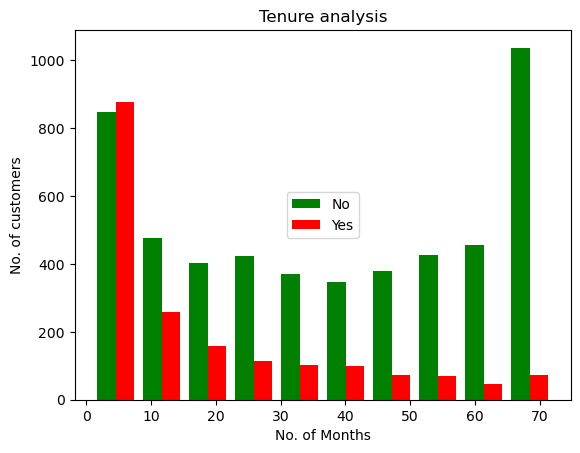

In [89]:
plt.hist([tenure0, tenure1], color = ['green', 'red'], label = ['No', 'Yes'])
plt.xlabel("No. of Months")
plt.ylabel("No. of customers")
plt.legend(loc = "center")
plt.title("Tenure analysis")
plt.show()

# For monthly charges

In [91]:
monthlyChareges0 = final[final['Churn'] == 0].MonthlyCharges
monthlyChareges1 = final[final['Churn'] == 1].MonthlyCharges

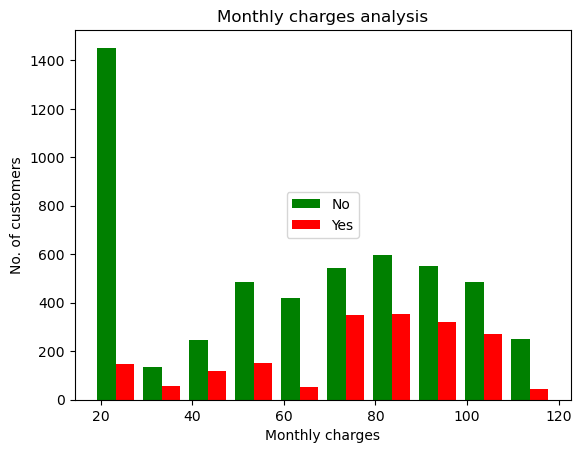

In [92]:
plt.hist([monthlyChareges0, monthlyChareges1], color = ['green', 'red'], label = ['No', 'Yes'])
plt.xlabel("Monthly charges")
plt.ylabel("No. of customers")
plt.legend(loc = "center")
plt.title("Monthly charges analysis")
plt.show()

In [93]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [94]:
X = final.drop("Churn", axis = True)
y = final.Churn

In [95]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,1,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,1,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,0,1,0,0,0,1,0


In [96]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [99]:
scaler = MinMaxScaler()

In [100]:
scaled = scaler.fit_transform(X)

In [101]:
scaled

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [102]:
scaled.shape

(7032, 23)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [106]:
X_train.shape

(5625, 23)

In [107]:
X_test.shape

(1407, 23)

In [108]:
lr = LogisticRegression(max_iter=100000)

In [109]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [110]:
lr.score(X_test, y_test)

0.7867803837953091

In [111]:
y_pred = lr.predict(X_train)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [112]:
cf = confusion_matrix(y_train, y_pred)

In [113]:
labels = ['NO', 'YES']

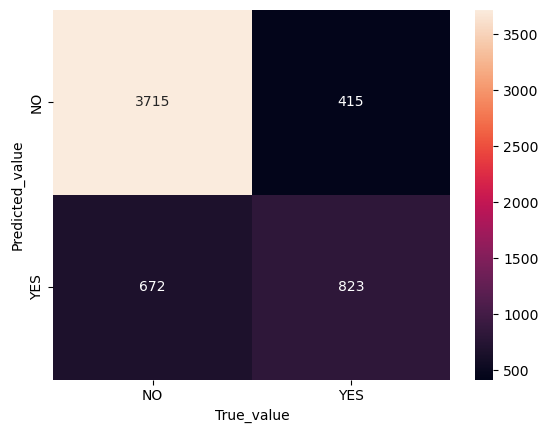

In [114]:
sns.heatmap(cf ,annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.xlabel('True_value')
plt.ylabel('Predicted_value')
plt.show()

# Handling imbalanced data

In [115]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [116]:
final['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [117]:
df0 = final[final["Churn"]==0]
df1 = final[final["Churn"]==1]

In [118]:
df0.shape

(5163, 24)

In [121]:
df1.shape

(1869, 24)

# Under-sampling majority class

In [124]:
df0_undersample =df0.sample(df1.shape[0])

In [125]:
df0_undersample.shape

(1869, 24)

In [126]:
undersample = pd.concat([df1, df0_undersample])

In [127]:
undersample.shape

(3738, 24)

In [129]:
undersample.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0
5,1,0,0,0,8,1,1,0,0,1,...,99.65,820.50,1,0,1,0,0,0,1,0
8,1,0,1,0,28,1,1,0,0,1,...,104.80,3046.05,1,0,1,0,0,0,1,0
13,0,0,0,0,49,1,1,0,1,1,...,103.70,5036.30,1,0,1,0,0,0,0,0


In [130]:
col_scale = undersample[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [131]:
undersample[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(col_scale)

In [132]:
X_low = undersample.drop("Churn", axis = 1)
y_low = undersample.Churn

In [133]:
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=0.20, random_state=42)

In [40]:
lr.fit(X_low_train, y_low_train)
lr.score(X_low_test, y_low_test)

0.8168914123491838

In [41]:
y_low_pred = lr.predict(X_low_train)
y_low_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

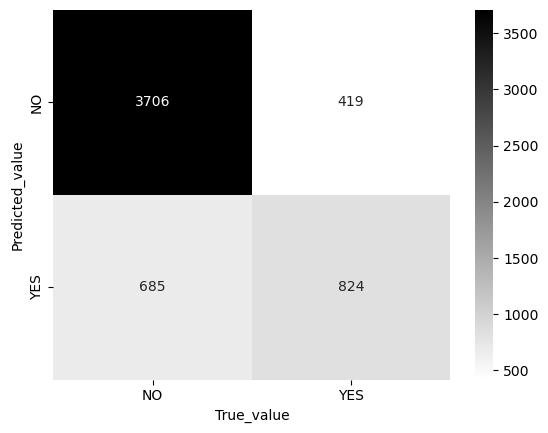

In [42]:
cf1 = confusion_matrix(y_low_train, y_low_pred)
sns.heatmap(cf1 ,annot=True, fmt = 'd', cmap="binary", xticklabels=labels, yticklabels=labels)
plt.xlabel('True_value')
plt.ylabel('Predicted_value')
plt.show()

# Over Sampling Minority class by duplication

In [43]:
increased = df1.sample(df1.shape[0], replace = True)

In [44]:
high = pd.concat([increased,df0])

In [45]:
X_high = high.drop("Churn", axis = 1)
y_high = high.Churn

In [46]:
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size=0.20, random_state=42)

In [47]:
lr.fit(X_high_train, y_high_train)
lr.score(X_high_test, y_high_test)

0.8026969481902059

In [48]:
y_high_pred = lr.predict(X_high_train)
y_high_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

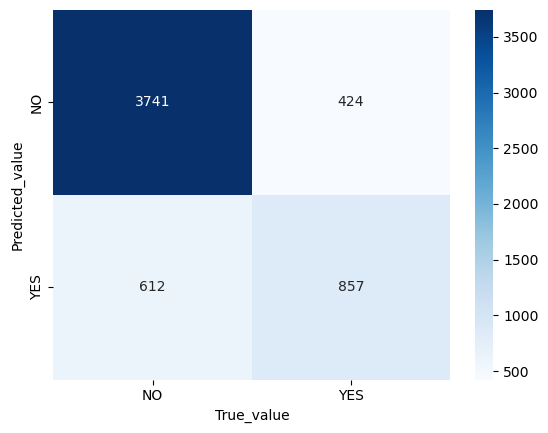

In [49]:
cf2 = confusion_matrix(y_high_train, y_high_pred)
sns.heatmap(cf2 ,annot=True, fmt = 'd', cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
plt.xlabel('True_value')
plt.ylabel('Predicted_value')
plt.show()

In [50]:
print(classification_report(y_high_train, y_high_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4165
           1       0.67      0.58      0.62      1469

    accuracy                           0.82      5634
   macro avg       0.76      0.74      0.75      5634
weighted avg       0.81      0.82      0.81      5634



on resume description

To predict which customers are likely to leave a company (churn) based on
telecom data.
In this work, We Data Prepossessing, and Correlation Matrix and use Supervised ML
models like Logistics Regression and Random Forest Classifier also and fit the various
model to check which model gives us the best accuracy by the evolution of metrics and


Conclusion:

By leveraging this dataset, organizations can gain insights, develop data-driven strategies, and improve customer retention efforts, leading to enhanced customer satisfaction, increased revenue, and sustainable business growth.

Achieve 87% accuracy in predictions and recommendations."